In [1]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from pydae.bmapu import bmapu_builder

"socs" :[ 0.000, 0.048, 0.095, 0.142, 0.190, 0.285, 0.380, 0.475, 0.570, 0.665, 0.760, 0.807, 0.855, 0.902, 0.950, 1.000],
"es" : [ 0.880, 1.002, 1.007, 1.016, 1.024, 1.032, 1.033, 1.034, 1.037, 1.044, 1.044, 1.044, 1.044, 1.044, 1.044, 1.056],
"socs" :[ 0.000, 0.050, 0.100, 0.150, 0.200, 0.300, 0.400, 0.500, 0.600, 0.700, 0.800, 0.850, 0.900, 0.950, 1.000],
"es" : [ 0.842, 0.954, 0.960, 0.968, 0.975, 0.986, 0.986, 0.987, 0.997, 0.998, 0.998, 0.998, 0.998, 0.999, 1.011],


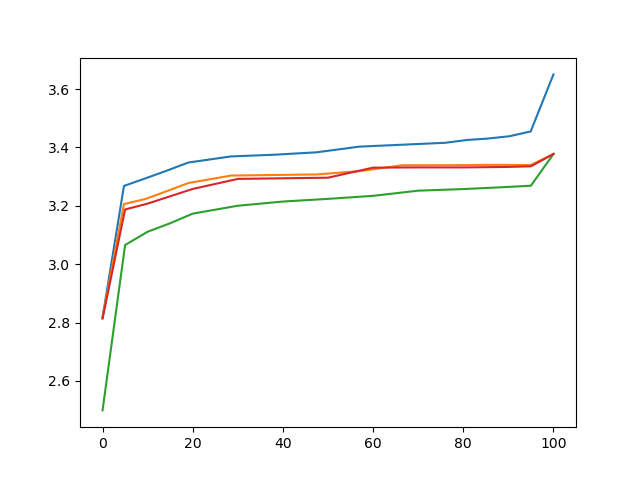

In [2]:
Discharge = np.array([		
# SOC/%,   Dynamic/V, Static/V
[100,	3.377812,	3.377812],
[ 95,	3.269052,	3.335569],
[ 90,	3.264910,	3.333467],
[ 85,	3.261151,	3.332511],
[ 80,	3.257583,	3.331746],
[ 70,	3.252040,	3.331746],
[ 60,	3.234328,	3.330982],
[ 50,	3.224006,	3.296576],
[ 40,	3.214768,	3.294474],
[ 30,	3.200432,	3.292371],
[ 20,	3.173353,	3.257966],
[ 15,	3.140477,	3.232926],
[ 10,	3.111296,	3.207695],
[  5,	3.065741,	3.187625],
[  0,	2.499053,	2.813560]])


Charge = np.array([				
# SOC/%,   Dynamic/V, Static/V
[     0,	2.817575, 2.817575],
[  4.75,	3.268287, 3.205975],
[  9.50,	3.294155, 3.223560],
[ 14.24,	3.320596, 3.250320],
[ 18.99,	3.348376, 3.278036],
[ 28.49,	3.369465, 3.303840],
[ 37.98,	3.375136, 3.305751],
[ 47.48,	3.383546, 3.307662],
[ 56.97,	3.402978, 3.318940],
[ 66.47,	3.409541, 3.339201],
[ 75.96,	3.416104, 3.339392],
[ 80.71,	3.425597, 3.339774],
[ 85.46,	3.430631, 3.340539],
[ 90.21,	3.438531, 3.340348],
[ 94.95,	3.455033, 3.339774],
[100.00,	3.650507, 3.377812]])

fig,axes = plt.subplots(nrows=1)
axes.plot(Charge[:,0], Charge[:,1])
axes.plot(Charge[:,0], Charge[:,2])
axes.plot(Discharge[:,0], Discharge[:,1])
axes.plot(Discharge[:,0], Discharge[:,2])

# for ax in axes.flatten():
#     ax.grid()
V_nom = 3.2
socs = list(Charge[:,0]/100)
es   = Charge[:,2]/V_nom
#print(list(es))
socs_str = '"socs" :[ '
e_str = '"es" : [ '
for soc,e in zip(socs,es):
    socs_str += f'{soc:5.3f}, '
    e_str += f'{e:5.3f}, ' 
socs_str += f']'
socs_str = socs_str.replace(', ]', '],')
print(socs_str)
e_str += f']'
e_str = e_str.replace(', ]', '],')
print(e_str)

V_nom = 3.34
socs = list(np.flipud(Discharge[:,0])/100)
es   = np.flipud(Discharge[:,2])/V_nom
#print(list(es))
socs_str = '"socs" :[ '
e_str = '"es" : [ '
for soc,e in zip(socs,es):
    socs_str += f'{soc:5.3f}, '
    e_str += f'{e:5.3f}, ' 
socs_str += f']'
socs_str = socs_str.replace(', ]', '],')
print(socs_str)
e_str += f']'
e_str = e_str.replace(', ]', '],')
print(e_str)

#"es" : [ 0.8, 0.950, 0.965, 0.973, 0.981, 0.989, 0.990, 0.990, 0.994, 1.000, 1.000, 1.000, 1.000, 1.000, 1.010, 1.015],
#"socs" : [ 1.000, 0.950, 0.900, 0.850, 0.800, 0.700, 0.600, 0.500, 0.400, 0.300, 0.200, 0.150, 0.100, 0.050, 0.000],


In [3]:
import temp



Text(0.5, 0, 'Time (s)')

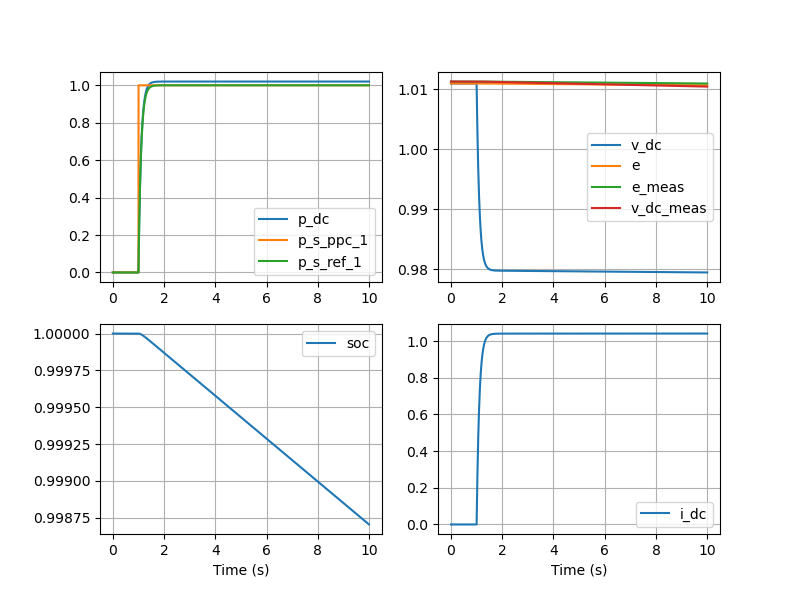

In [14]:
model = temp.model()
model.Dt = 0.001
model.decimation = 1
R_bat = 0.03
model.ini({'A_loss_1':0.02,'R_bat_1':R_bat,'soc_ref_1':1.0, 'soc_min_1':0.001, 'p_s_ppc_1':0.0 },'xy_0.json')
model.run( 1,{}) # half an hour discharging
model.run(10,{'p_s_ppc_1':1}) # half an hour discharging
#model.run(4.0*3600,{'p_s_ref_1':-0.95}) # half an hour discharging
model.post()
N_s = 1
fig,axes = plt.subplots(nrows=2,ncols=2, figsize=(8,6))
axes[0,0].plot(model.Time, model.get_values('p_dc_1'), label='p_dc')
axes[0,0].plot(model.Time, model.get_values('p_s_ppc_1'), label='p_s_ppc_1')
axes[0,0].plot(model.Time, model.get_values('p_s_ref_1'), label='p_s_ref_1')
axes[1,0].plot(model.Time, model.get_values('soc_1'), label='soc')
axes[0,1].plot(model.Time, model.get_values('v_dc_1'), label='v_dc')
axes[0,1].plot(model.Time, model.get_values('e_1'), label='e')
axes[1,1].plot(model.Time, model.get_values('i_dc_1'), label='i_dc')

e_measurement    = np.interp(model.get_values('soc_1')*100,  np.flipud(Discharge[:,0]), np.flipud(Discharge[:,2]))/V_nom
v_dc_measurement = np.interp(model.get_values('soc_1')*100,  np.flipud(Discharge[:,0]), np.flipud(Discharge[:,1]))/V_nom
axes[0,1].plot(model.Time, e_measurement, label='e_meas')
axes[0,1].plot(model.Time, v_dc_measurement, label='v_dc_meas')

for ax in axes.flatten():
    ax.grid()
    ax.legend()

axes[1,0].set_xlabel('Time (s)')
axes[1,1].set_xlabel('Time (s)')

Text(0.5, 0, 'Time (s)')

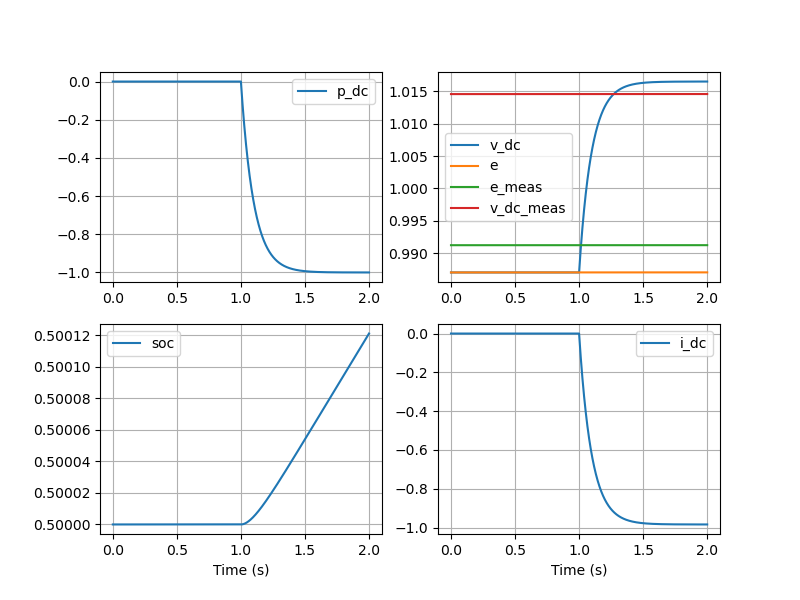

In [13]:
model = temp.model()
model.Dt = 1e-3
model.decimation = 1

model.ini({'A_loss_1':0.0,'R_bat_1':R_bat,'soc_ref_1':0.5, 'soc_min_1':0.001 },'xy_0.json')
model.run(1,{}) # half an hour discharging
model.run(2,{'p_s_ppc_1':-1}) # half an hour discharging

#model.run(4.0*3600,{'p_s_ref_1':-0.95}) # half an hour discharging
model.post()

fig,axes = plt.subplots(nrows=2,ncols=2, figsize=(8,6))
axes[0,0].plot(model.Time, model.get_values('p_dc_1'), label='p_dc')
axes[1,0].plot(model.Time, model.get_values('soc_1'), label='soc')
axes[0,1].plot(model.Time, model.get_values('v_dc_1'), label='v_dc')
axes[0,1].plot(model.Time, model.get_values('e_1'), label='e')
axes[1,1].plot(model.Time, model.get_values('i_dc_1'), label='i_dc')

e_measurement    = np.interp(model.get_values('soc_1')*100,  Charge[:,0], Charge[:,2])/V_nom
v_dc_measurement = np.interp(model.get_values('soc_1')*100,  Charge[:,0], Charge[:,1])/V_nom
axes[0,1].plot(model.Time, e_measurement, label='e_meas')
axes[0,1].plot(model.Time, v_dc_measurement, label='v_dc_meas')

for ax in axes.flatten():
    ax.grid()
    ax.legend()

axes[1,0].set_xlabel('Time (s)')
axes[1,1].set_xlabel('Time (s)')

In [6]:
Discharge[:,1]

array([3.377812, 3.269052, 3.26491 , 3.261151, 3.257583, 3.25204 ,
       3.234328, 3.224006, 3.214768, 3.200432, 3.173353, 3.140477,
       3.111296, 3.065741, 2.499053])

In [7]:
np.flipud(model.get_values('soc_1')*100)

array([50.01211539, 50.01210195, 50.01208851, ..., 50.        ,
       50.        , 50.        ])

In [8]:
model.get_value('K_p_1')

1e-06

In [9]:
model = temp.model()
model.Dt = 1.0
model.decimation = 1

model.ini({'A_loss_1':0.0,'R_bat_1':0.1},'xy_0.json')
model.run(1.5*3600,{'p_s_ref_1':1.0}) # an hour discharging
model.post()

Input or parameter p_s_ref_1 not found.


UnboundLocalError: cannot access local variable 'values' where it is not associated with a value

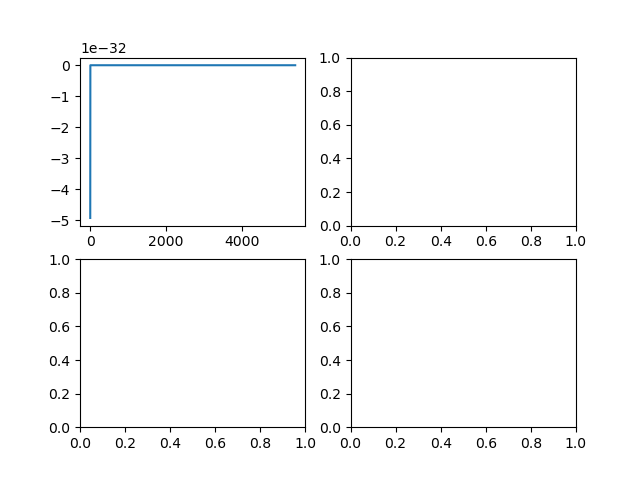

In [10]:
fig,axes = plt.subplots(nrows=2,ncols=2)
axes[0,0].plot(model.Time, model.get_values('p_dc_1'))
axes[1,0].plot(model.Time, model.get_values('sigma_1'))
axes[0,1].plot(model.Time, model.get_values('v_dc_1'))
axes[1,1].plot(model.Time, model.get_values('i_dc_1'))

for ax in axes.flatten():
    ax.grid()

axes[1,0].set_ylim(-0.001,0.001)

In [ ]:
model.report_params()

S_base =100000000.00
U_1_n =20000.00
K_p_1 = 0.00
K_i_1 = 0.00
soc_min_1 = 0.00
soc_max_1 = 1.00
S_n_1 =10000000.00
E_kWh_1 =20000.00
A_loss_1 = 0.00
B_loss_1 = 0.00
C_loss_1 = 0.00
R_bat_1 =10.00
K_p_agc = 0.00
K_i_agc = 0.00
K_xif = 0.00


In [ ]:
np.array([600, 650, 680, 700,710,750])/600

array([1.        , 1.08333333, 1.13333333, 1.16666667, 1.18333333,
       1.25      ])